<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Project - Auto Sales</b></p>

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#organizing-columns">Organizing Columns</a></li>
<li><a href="#nan-values">NaN Values</a></li>
<li><a href="#data-visualization">Data Visualization</a></li>
</ul>

<a id='import-library'></a>
# <font color='firebrick'> <b>Importing Libraries</b><font color='black'> 

In [347]:
# ! pip install squarify

In [349]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import squarify # for treemap

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='firebrick'> <b>Loading The Dataset</b><font color='black'> 

In [11]:
df0 = pd.read_csv("Auto Sales data.csv")
df = df0.copy()

In [12]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [13]:
df.sample(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
1000,10281,25,167.65,5,4191.25,19/08/2019,1287,Shipped,Classic Cars,169,S18_3232,Diecast Classics Inc.,2155551555,7586 Pompton St.,Allentown,70267,USA,Yu,Kyung,Medium
1071,10103,46,104.17,16,4791.82,29/01/2018,1925,Shipped,Vintage Cars,99,S18_3320,Baane Mini Imports,07-98 9555,Erling Skakkes gate 78,Stavern,4110,Norway,Bergulfsen,Jonas,Medium
1743,10239,20,44.56,2,891.20,12/04/2019,2159,Shipped,Classic Cars,37,S24_2972,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Small
2659,10306,30,117.19,5,3515.70,14/10/2019,2890,Shipped,Ships,99,S700_3962,"AV Stores, Co.",(171) 555-1555,Fauntleroy Circus,Manchester,EC2 5NT,UK,Ashworth,Victoria,Medium
1738,10181,37,42.67,8,1578.79,12/11/2018,2305,Shipped,Classic Cars,37,S24_2972,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,N 5804,Norway,Oeztan,Veysel,Small


<a id='understanding-dataset'></a>
# <font color='firebrick'> <b>Understanding The Dataset</b><font color='black'> 

- **ORDERNUMBER:** This column represents the unique identification number assigned to each order.
- **QUANTITYORDERED:** It indicates the number of items ordered in each order.
- **PRICEEACH:** This column specifies the price of each item in the order.
- **ORDERLINENUMBER:** It represents the line number of each item within an order.
- **SALES:** This column denotes the total sales amount for each order, which is calculated by multiplying the quantity ordered by the price of each item.
- **ORDERDATE:** It denotes the date on which the order was placed.
- **DAYS_SINCE_LASTORDER:** This column represents the number of days that have passed since the last order for each customer. It can be used to analyze customer purchasing patterns.
- **STATUS:** It indicates the status of the order, such as "Shipped," "In Process," "Cancelled," "Disputed," "On Hold," or "Resolved."
- **PRODUCTLINE:** This column specifies the product line categories to which each item belongs.
- **MSRP:** It stands for Manufacturer's Suggested Retail Price and represents the suggested selling price for each item.
- **PRODUCTCODE:** This column represents the unique code assigned to each product.
- **CUSTOMERNAME:** It denotes the name of the customer who placed the order.
- **PHONE:** This column contains the contact phone number for the customer.
- **ADDRESSLINE1:** It represents the first line of the customer's address.
- **CITY:** This column specifies the city where the customer is located.
- **POSTALCODE:** It denotes the postal code or ZIP code associated with the customer's address.
- **COUNTRY:** This column indicates the country where the customer is located.
- **CONTACTLASTNAME:** It represents the last name of the contact person associated with the customer.
- **CONTACTFIRSTNAME:** This column denotes the first name of the contact person associated with the customer.
- **DEALSIZE:** It indicates the size of the deal or order, which are the categories "Small," "Medium," or "Large."

In [17]:
df.shape

(2747, 20)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098952,42.042549,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [20]:
df.describe(include= 'object').T

,count,unique,top,freq
ORDERDATE,2747,246,14/11/2018,38
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928


In [21]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2747   │ │ string      │ 13    │                                                          │
│ │ Number of columns │ 20     │ │ int32       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ ORDERNUMBER             │   0 │     0 │  10260 │  91.88 │  10100 │  10180 │ 10260 │ 10330 │ 10420 │ ▇▇▆▇▇▆ │  │
│ │ QUANTITYORDERED         │   0 │     0 │   35.1 │  9.762 │      6 │     27 │    35 │    43 │    97 │  ▁▇▇   │  │
│ │ PRICEEACH               │   0 │     0 │  101.1 │  42.04 │  26.88 │  68.75 │ 95.55 │ 127.1 │ 252.9 │ ▅▇▆▃▁  │  │
│ │ ORDERLINENUMBER         │   0 │     0 │  6.491 │  4.231 │      1 │      3 │     6 │     9 │    18 │ ▇▇▅▃▂▁ │  │
│ │ SALES                   │   0 │     0 │   3553 │   1839 │  482.1 │   2204 │  3185 │  4503 │ 14080 │  ▇▇▃▁  │  │
│ │ DAYS_SINCE_LASTORDER    │   0 │     0 │   1757 │  819.3 │     42 │   1077 │  1761 │  2436 │  3562 │ ▃▇▇▇▇▂ │  │
│ │ MSRP                    │   0 │     0 │  100.7 │  40.11 │     33 │     68 │    99 │   124 │   214 │ ▆▇▇▅▂▁ │  │
│ └─────────────────────────┴─────┴───────┴────────┴────────┴────────┴────────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ORDERDATE                        │      0 │         0 │                          1 │                  2747 │  │
│ │ STATUS                           │      0 │         0 │                          1 │                  2832 │  │
│ │ PRODUCTLINE                      │      0 │         0 │                        1.8 │                  4865 │  │
│ │ PRODUCTCODE                      │      0 │         0 │                          1 │                  2747 │  │
│ │ CUSTOMERNAME                     │      0 │         0 │                        3.1 │                  8496 │  │
│ │ PHONE                            │      0 │         0 │                          2 │                  5517 │  │
│ │ ADDRESSLINE1                     │      0 │         0 │                        3.5 │                  9478 │  │
│ │ CITY                             │      0 │         0 │                        1.2 │                  3274 │  │
│ │ POSTALCODE                       │      0 │         0 │                        1.1 │                  3097 │  │
│ │ COUNTRY                          │      0 │         

In [22]:
df.duplicated().sum()

0

In [23]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

<a id='organizing-columns'></a>
# <font color='firebrick'> <b>Organizing Columns</b><font color='black'> 

In [25]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [26]:
df.columns = df.columns.str.lower()
df.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'days_since_lastorder', 'status', 'productline',
       'msrp', 'productcode', 'customername', 'phone', 'addressline1', 'city',
       'postalcode', 'country', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')

In [27]:
df.columns = ['order_number', 'quantity_ordered', 'price_each', 'order_line_number',
       'total_price', 'order_date', 'days_since_lastorder', 'status', 'product_line',
       'msrp', 'product_code', 'customer_name', 'phone', 'address_line1', 'city',
       'postal_code', 'country', 'contact_lastname', 'contact_firstname',
       'deal_size']
df.columns

Index(['order_number', 'quantity_ordered', 'price_each', 'order_line_number',
       'total_price', 'order_date', 'days_since_lastorder', 'status',
       'product_line', 'msrp', 'product_code', 'customer_name', 'phone',
       'address_line1', 'city', 'postal_code', 'country', 'contact_lastname',
       'contact_firstname', 'deal_size'],
      dtype='object')

## <font color='indianred'> <b>"order_number" Column</b><font color='black'> 

In [29]:
df.order_number.nunique()

298

In [30]:
df.order_number.unique()

array([10107, 10121, 10134, 10145, 10168, 10180, 10188, 10211, 10223,
       10237, 10251, 10263, 10275, 10285, 10299, 10309, 10318, 10329,
       10341, 10361, 10375, 10388, 10403, 10417, 10103, 10112, 10126,
       10140, 10150, 10163, 10174, 10183, 10194, 10206, 10215, 10228,
       10245, 10258, 10270, 10280, 10291, 10304, 10312, 10322, 10347,
       10357, 10369, 10391, 10411, 10424, 10120, 10210, 10236, 10298,
       10308, 10339, 10374, 10402, 10362, 10105, 10119, 10129, 10143,
       10155, 10167, 10178, 10186, 10197, 10222, 10248, 10261, 10273,
       10283, 10295, 10307, 10316, 10325, 10337, 10350, 10359, 10373,
       10395, 10400, 10414, 10114, 10164, 10175, 10207, 10217, 10229,
       10259, 10281, 10305, 10313, 10334, 10370, 10425, 10108, 10122,
       10135, 10147, 10169, 10181, 10191, 10203, 10225, 10238, 10253,
       10266, 10276, 10287, 10300, 10310, 10320, 10363, 10389, 10419,
       10117, 10127, 10142, 10153, 10165, 10176, 10185, 10196, 10208,
       10220, 10231,

**order_number column seems OK.**

## <font color='indianred'> <b>"quantity_ordered" Column</b><font color='black'> 

In [33]:
df.quantity_ordered.nunique()

58

In [34]:
df.quantity_ordered.unique()

array([30, 34, 41, 45, 36, 29, 48, 37, 23, 28, 46, 42, 20, 21, 24, 66, 26,
       38, 47, 35, 32, 40, 50, 39, 27, 22, 44, 31, 33, 49, 43, 56, 25, 64,
       19, 12, 55, 10, 54, 97, 61, 51, 59, 76,  6, 15, 60, 65, 58, 16, 70,
       13, 18, 52, 11, 62, 85, 77], dtype=int64)

**quantity_ordered column seems OK.**

## <font color='indianred'> <b>"price_each" Column</b><font color='black'> 

In [37]:
df.price_each.nunique()

1843

In [38]:
df.price_each.dtype

dtype('float64')

**price_each column seems OK.**

## <font color='indianred'> <b>"order_line_number" Column</b><font color='black'> 

In [41]:
df.order_line_number.nunique()

18

In [42]:
df.order_line_number.unique()

array([ 2,  5,  6,  1,  9, 14,  7, 13, 12,  4, 11,  8,  3, 10, 15, 17, 16,
       18], dtype=int64)

**order_line_number column seems OK.**

## <font color='indianred'> <b>"total_price" Column</b><font color='black'> 

In [45]:
df.total_price.nunique()

2690

In [46]:
df.total_price.dtype

dtype('float64')

**total_price column seems OK.**

## <font color='indianred'> <b>"order_date" Column</b><font color='black'> 

In [49]:
df.order_date.nunique()

246

In [50]:
df.order_date.dtype

dtype('O')

In [51]:
# changing dtype of order_date column to datetime
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')

## <font color='indianred'> <b>"days_since_lastorder" Column</b><font color='black'> 

In [53]:
df.days_since_lastorder.nunique()

1832

In [54]:
df.days_since_lastorder.dtype

dtype('int64')

**days_since_lastorder column seems OK.**

## <font color='indianred'> <b>"status" Column</b><font color='black'> 

In [57]:
df.status.nunique()

6

In [58]:
df.status.unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [59]:
df['status'] = df['status'].str.strip()

## <font color='indianred'> <b>"product_line" Column</b><font color='black'> 

In [61]:
df.product_line.nunique()

7

In [62]:
df.product_line.unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [63]:
df['product_line'] = df['product_line'].str.strip()

## <font color='indianred'> <b>"msrp" Column</b><font color='black'> 

In [65]:
df.msrp.nunique()

80

In [66]:
df.msrp.unique()

array([ 95, 214, 118, 193, 136, 147, 194, 207, 150, 151, 117, 173,  79,
       115, 116, 141, 102,  53, 124, 157, 170,  77, 142, 163,  60, 122,
       127,  84, 168, 132, 101,  62,  86, 104, 169, 100,  80,  99, 146,
       105, 143,  92,  87, 121,  50, 148,  71,  73,  57, 112, 109,  33,
        76,  44,  69,  90,  35,  68,  37,  88,  85,  61,  65, 107,  83,
       140,  41,  97,  72,  96,  40,  54,  64,  43,  58,  81,  66,  91,
        74,  49], dtype=int64)

**msrp column seems OK.**

## <font color='indianred'> <b>"product_code" Column</b><font color='black'> 

In [69]:
df.product_code.nunique()

109

In [70]:
df.product_code.unique()

array(['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', 'S10_4757',
       'S10_4962', 'S12_1099', 'S12_1108', 'S12_1666', 'S12_2823',
       'S12_3148', 'S12_3380', 'S12_3891', 'S12_3990', 'S12_4473',
       'S12_4675', 'S18_1097', 'S18_1129', 'S18_1342', 'S18_1367',
       'S18_1589', 'S18_1662', 'S18_1749', 'S18_1889', 'S18_1984',
       'S18_2238', 'S18_2248', 'S18_2319', 'S18_2325', 'S18_2432',
       'S18_2581', 'S18_2625', 'S18_2795', 'S18_2870', 'S18_2949',
       'S18_2957', 'S18_3029', 'S18_3136', 'S18_3140', 'S18_3232',
       'S18_3259', 'S18_3278', 'S18_3320', 'S18_3482', 'S18_3685',
       'S18_3782', 'S18_3856', 'S18_4027', 'S18_4409', 'S18_4522',
       'S18_4600', 'S18_4668', 'S18_4721', 'S18_4933', 'S24_1046',
       'S24_1444', 'S24_1578', 'S24_1628', 'S24_1785', 'S24_1937',
       'S24_2000', 'S24_2011', 'S24_2022', 'S24_2300', 'S24_2360',
       'S24_2766', 'S24_2840', 'S24_2841', 'S24_2887', 'S24_2972',
       'S24_3151', 'S24_3191', 'S24_3371', 'S24_3420', 'S24_34

In [71]:
df['product_code'] = df['product_code'].str.strip()

## <font color='indianred'> <b>"customer_name" Column</b><font color='black'> 

In [73]:
df.customer_name.nunique()

89

In [74]:
df.customer_name.unique()

array(['Land of Toys Inc.', 'Reims Collectables', 'Lyon Souveniers',
       'Toys4GrownUps.com', 'Technics Stores Inc.',
       'Daedalus Designs Imports', 'Herkku Gifts', 'Auto Canal Petit',
       'Australian Collectors, Co.', 'Vitachrome Inc.',
       'Tekni Collectables Inc.', 'Gift Depot Inc.', 'La Rochelle Gifts',
       "Marta's Replicas Co.", 'Toys of Finland, Co.',
       'Baane Mini Imports', 'Diecast Classics Inc.',
       'Salzburg Collectables', 'Souveniers And Things Co.',
       'FunGiftIdeas.com', 'UK Collectables, Ltd.',
       'Euro Shopping Channel', 'Volvo Model Replicas, Co',
       'Corrida Auto Replicas, Ltd', 'Dragon Souveniers, Ltd.',
       'Classic Legends Inc.', 'Australian Gift Network, Co',
       'Classic Gift Ideas, Inc', 'Saveley & Henriot, Co.',
       'Canadian Gift Exchange Network', 'West Coast Collectables Co.',
       'Cambridge Collectables Co.', 'Super Scale Inc.',
       'Tokyo Collectables, Ltd', 'Amica Models & Co.',
       'Scandinavian Gift

In [75]:
df['customer_name'] = df['customer_name'].str.strip()

## <font color='indianred'> <b>"city" Column</b><font color='black'> 

In [120]:
df.city.nunique()

71

In [122]:
df.city.unique()

array(['NYC', 'Reims', 'Paris', 'Pasadena', 'Burlingame', 'Lille',
       'Bergen', 'Melbourne', 'Newark', 'Bridgewater', 'Nantes',
       'Cambridge', 'Helsinki', 'Stavern', 'Allentown', 'Salzburg',
       'Chatswood', 'New Bedford', 'Liverpool', 'Madrid', 'Lule',
       'Singapore', 'South Brisbane', 'Philadelphia', 'Lyon', 'Vancouver',
       'Burbank', 'New Haven', 'Minato-ku', 'Torino', 'Boras',
       'Versailles', 'San Rafael', 'Nashua', 'Brickhaven', 'North Sydney',
       'Montreal', 'Osaka', 'White Plains', 'Kobenhavn', 'London',
       'Toulouse', 'Barcelona', 'San Diego', 'Bruxelles', 'Tsawassen',
       'Boston', 'Cowes', 'Oulu', 'San Jose', 'Graz', 'Makati City',
       'Marseille', 'Koln', 'Gensve', 'Reggio Emilia', 'Frankfurt',
       'Espoo', 'Dublin', 'Manchester', 'Aaarhus', 'Glendale', 'Sevilla',
       'Brisbane', 'Strasbourg', 'Las Vegas', 'Oslo', 'Bergamo',
       'Glen Waverly', 'Munich', 'Charleroi'], dtype=object)

In [124]:
df['city'] = df['city'].str.strip()

## <font color='indianred'> <b>"country" Column</b><font color='black'> 

In [126]:
df.country.nunique()

19

In [128]:
df.country.unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [130]:
df['country'] = df['country'].str.strip()

## <font color='indianred'> <b>"contact_lastname & contact_firstname" Columns</b><font color='black'> 

In [132]:
df.contact_lastname.nunique()

76

In [134]:
df.contact_lastname.unique()

array(['Yu', 'Henriot', 'Da Cunha', 'Young', 'Hirano', 'Rance', 'Oeztan',
       'Perrier', 'Ferguson', 'Frick', 'Brown', 'King', 'Labrune',
       'Hernandez', 'Karttunen', 'Bergulfsen', 'Pipps', 'Huxley',
       'Benitez', 'Devon', 'Freyre', 'Berglund', 'Sommer', 'Natividad',
       'Calaghan', 'Cervantes', 'Saveley', 'Tannamuri', 'Thompson',
       'Tseng', 'Murphy', 'Shimamura', 'Accorti', 'Larsson', 'Tonini',
       'Nelson', "O'Hara", 'Fresnisre', 'Kentary', 'Schmitt', 'Petersen',
       'Tam', 'Roulet', 'Hardy', 'Saavedra', 'Dewey', 'Lincoln',
       'Yoshido', 'Bennett', 'Koskitalo', 'Bertrand', 'Mendel', 'Franco',
       'Victorino', 'Cruz', 'Lebihan', 'Pfalzheim', 'Holz', 'Moroni',
       'Barajas', 'Keitel', 'Suominen', 'Cassidy', 'Fernandez',
       'Ashworth', 'Ibsen', 'Kuo', 'Roel', 'Taylor', 'Citeaux', 'Klaeboe',
       'Rovelli', 'Connery', 'Lewis', 'Donnermeyer', 'Cartrain'],
      dtype=object)

In [136]:
df['contact_lastname'] = df['contact_lastname'].str.strip()

In [138]:
df.contact_firstname.nunique()

72

In [140]:
df.contact_firstname.unique()

array(['Kwai', 'Paul', 'Daniel', 'Julie', 'Juri', 'Martine', 'Veysel',
       'Dominique', 'Peter', 'Michael', 'William', 'Janine', 'Marta',
       'Matti', 'Jonas', 'Kyung', 'Georg', 'Adrian', 'Violeta',
       'Elizabeth', 'Diego', 'Christina', 'Mart¡n', 'Eric', 'Maria',
       'Tony', 'Francisca', 'Mary', 'Yoshi', 'Steve', 'Leslie', 'Akiko',
       'Paolo', 'Valarie', 'Allen', 'Anna', 'Jean', 'Mory', 'Rosa',
       'Carine', 'Jytte', 'Ann', 'Wing C', 'Annette', 'Thomas', 'Eduardo',
       'Catherine', 'Helen', 'Pirkko', 'Sue', 'Marie', 'Roland', 'Wendy',
       'Arnold', 'Laurence', 'Henriette', 'Maurizio', 'Miguel', 'Kalle',
       'Jeff', 'Dean', 'Jesus', 'Victoria', 'Palle', 'Kee', 'Jose Pedro',
       'Frederique', 'Jan', 'Giovanni', 'Sean', 'Dan', 'Pascale'],
      dtype=object)

In [142]:
df['contact_firstname'] = df['contact_firstname'].str.strip()

Let's combine these two columns and create a new column called **contact_fullname**.

In [158]:
df['contact_fullname'] = df['contact_firstname'] + ' ' + df['contact_lastname']

In [162]:
df = df.drop(columns=['contact_firstname', 'contact_lastname'])

## <font color='indianred'> <b>"deal_size" Column</b><font color='black'> 

In [144]:
df.deal_size.nunique()

3

In [146]:
df.deal_size.unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [148]:
df['deal_size'] = df['deal_size'].str.strip()

## <font color='indianred'> <b>Drop Unnecessary Columns</b><font color='black'> 

It can be edited the **phone, address_line1 and postal_code columns** if desired. However, since these columns will not be used in this project, let's remove the these columns from the data set.

In [150]:
df = df.drop(columns=['phone', 'address_line1', 'postal_code'])

In [173]:
df.columns

Index(['order_number', 'quantity_ordered', 'price_each', 'order_line_number',
       'total_price', 'order_date', 'days_since_lastorder', 'status',
       'product_line', 'msrp', 'product_code', 'customer_name', 'city',
       'country', 'deal_size', 'contact_fullname'],
      dtype='object')

In [164]:
df.sample(5)

,order_number,quantity_ordered,price_each,order_line_number,total_price,order_date,days_since_lastorder,status,product_line,msrp,product_code,customer_name,city,country,deal_size,contact_fullname
2564,10411,34,105.20,4,3576.80,2020-05-01,2595,Shipped,Classic Cars,101,S700_2824,Quebec Home Shopping Network,Montreal,Canada,Medium,Jean Fresnisre
403,10126,38,101.50,10,3857.00,2018-05-28,1138,Shipped,Trucks and Buses,116,S18_1097,"Corrida Auto Replicas, Ltd",Madrid,Spain,Medium,Mart¡n Sommer
1320,10122,28,127.97,15,3583.16,2018-05-08,2075,Shipped,Classic Cars,148,S18_4721,Marseille Mini Autos,Marseille,France,Medium,Laurence Lebihan
2016,10228,33,103.23,6,3406.59,2019-03-10,2465,Shipped,Vintage Cars,97,S24_4258,Cambridge Collectables Co.,Cambridge,USA,Medium,Kyung Tseng
2469,10222,26,102.29,8,2659.54,2019-02-19,2937,Shipped,Ships,90,S700_2047,Collectable Mini Designs Co.,San Diego,USA,Small,Valarie Thompson


<a id='nan-values'></a>
# <font color='firebrick'> <b>NaN Values</b><font color='black'> 

In [166]:
df.isnull().sum()

order_number            0
quantity_ordered        0
price_each              0
order_line_number       0
total_price             0
order_date              0
days_since_lastorder    0
status                  0
product_line            0
msrp                    0
product_code            0
customer_name           0
city                    0
country                 0
deal_size               0
contact_fullname        0
dtype: int64

**There is no NaN values. This data set is quite clean in terms of NaN values.**

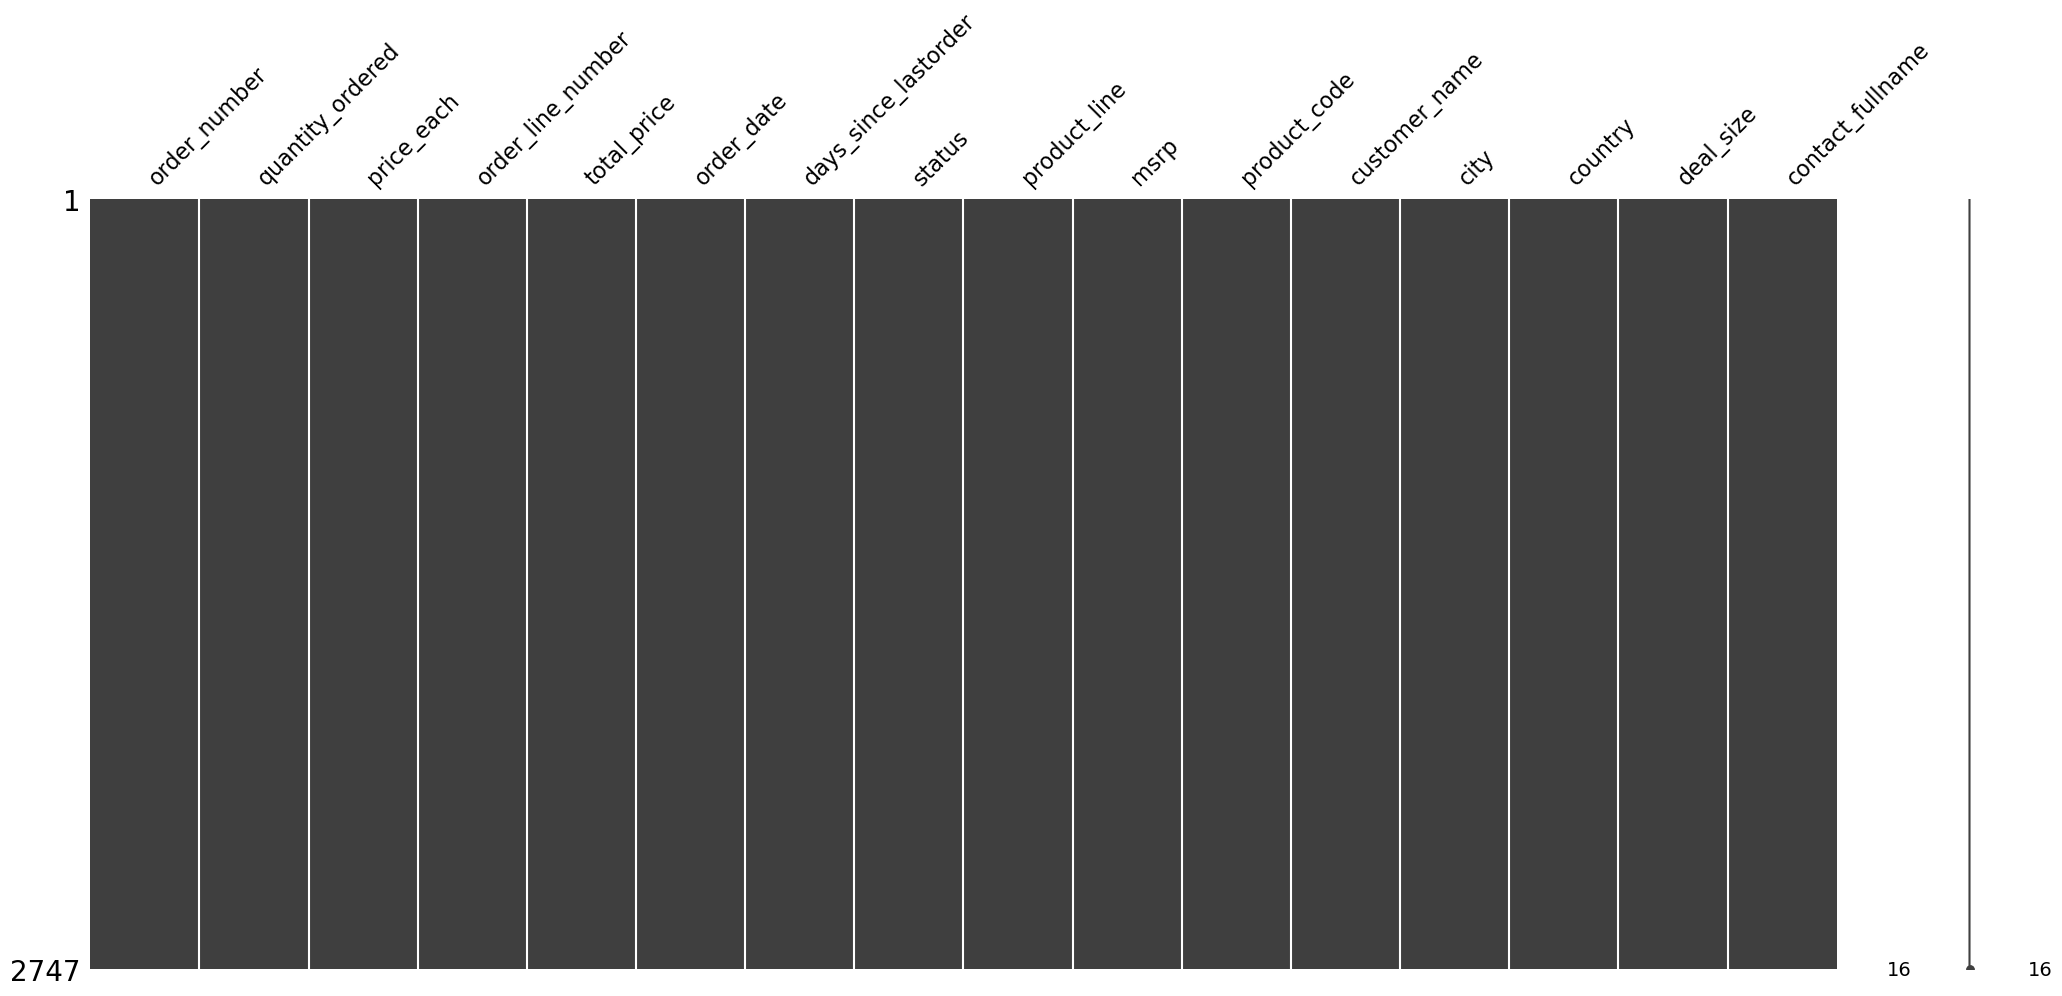

In [171]:
msno.matrix(df);

In [455]:
# saving last version of data set as csv file
# df.to_csv("edited_data.csv", index= False)

<a id='data-visualization'></a>
# <font color='firebrick'> <b>Data Visualization</b><font color='black'> 

## <font color='indianred'> <b>Distributions of Status</b><font color='black'> 

In [269]:
status_rate = df['status'].value_counts() / len(df) * 100
status_rate = round(status_rate, 2)
status_rate

status
Shipped       92.50
Cancelled      2.18
Resolved       1.71
On Hold        1.60
In Process     1.49
Disputed       0.51
Name: count, dtype: float64

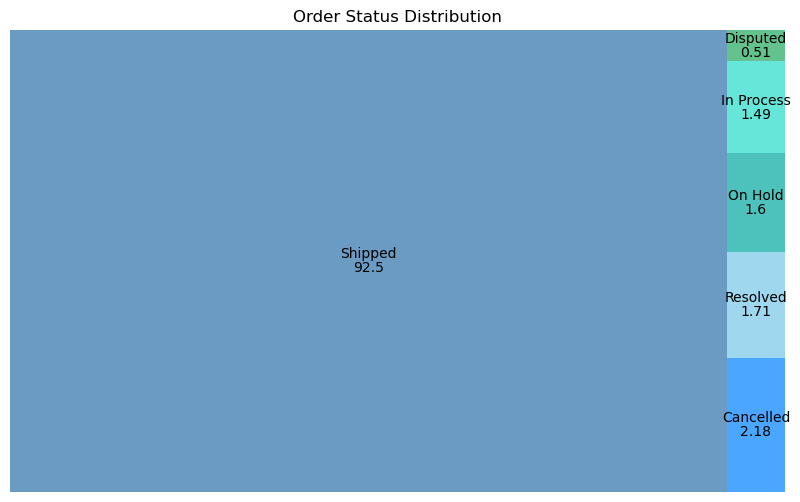

In [345]:
colors = ["steelblue", "dodgerblue", "skyblue", "lightseagreen", "turquoise", "mediumseagreen"]

# Creating Treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=status_rate, label=status_rate.index, alpha=0.8, color= colors, value=status_rate)

# Adding title
plt.title('Order Status Distribution')

# Showing the graph
plt.axis('off')
plt.show()

This Treemap chart shows the distribution of order statuses as percentages. Accordingly, it is observed that **approximately 92% of the orders** are **shipped**.

## <font color='indianred'> <b>Total Sales by Quantity Ordered</b><font color='black'> 

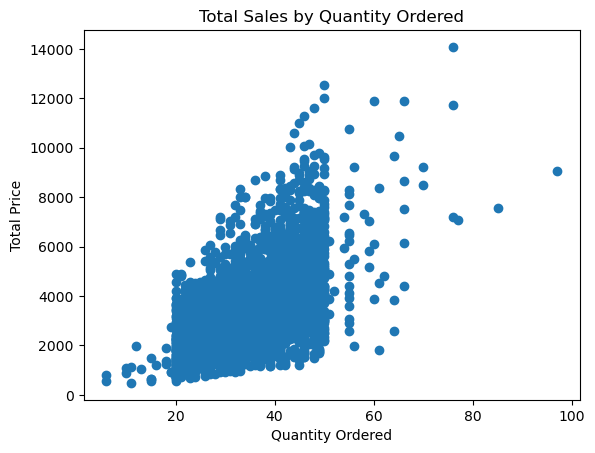

In [451]:
# Creating scatter plot
plt.scatter(df['quantity_ordered'], df['total_price'])

# Adding title and label names
plt.title('Total Sales by Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Total Price')

# Showing the graph
plt.show()

This scatter plot shows the relationship between the quantity ordered and the total price. Generally, as the quantity ordered increases, the total price tends to increase as well. However, there are some data points where similar quantities lead to varying total prices, which might reflect differences in product prices or customer choices. Overall, the plot indicates a positive correlation between quantity ordered and total price.

## <font color='indianred'> <b>Order Distribution by Country</b><font color='black'> 

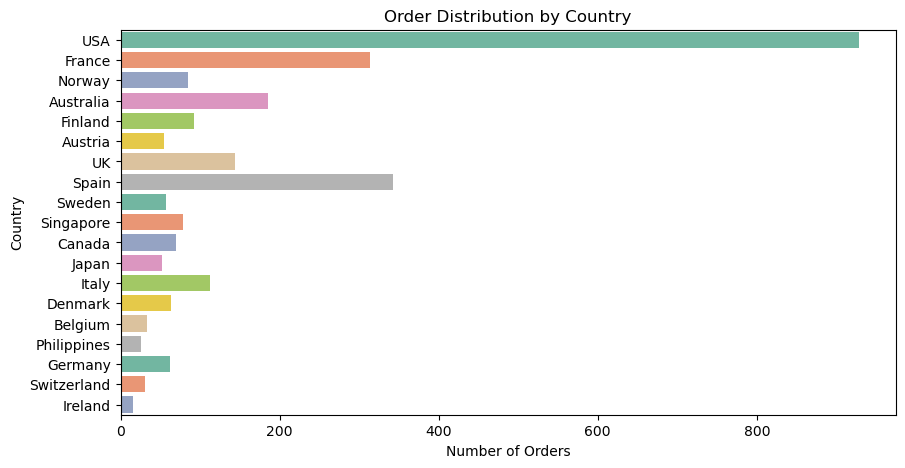

In [449]:
# Creating count plot
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(data = df, y = "country", palette = "Set2")

# Adding title and label names
plt.title('Order Distribution by Country')
plt.xlabel('Number of Orders')
plt.ylabel('Country')

# Showing the graph
plt.show()

This bar plot illustrates the distribution of orders by country. It is clear that **the USA accounts for the highest number of orders**, followed by **France** and **Spain**. The graph shows a significant gap, with the USA contributing the most orders compared to other countries, while other nations have relatively fewer orders.

## <font color='indianred'> <b>Total Sales by Top 10 City</b><font color='black'> 

In [301]:
city_sales = df.groupby('city')['total_price'].sum()
top10_city_sales = city_sales.sort_values(ascending= False)[:10]

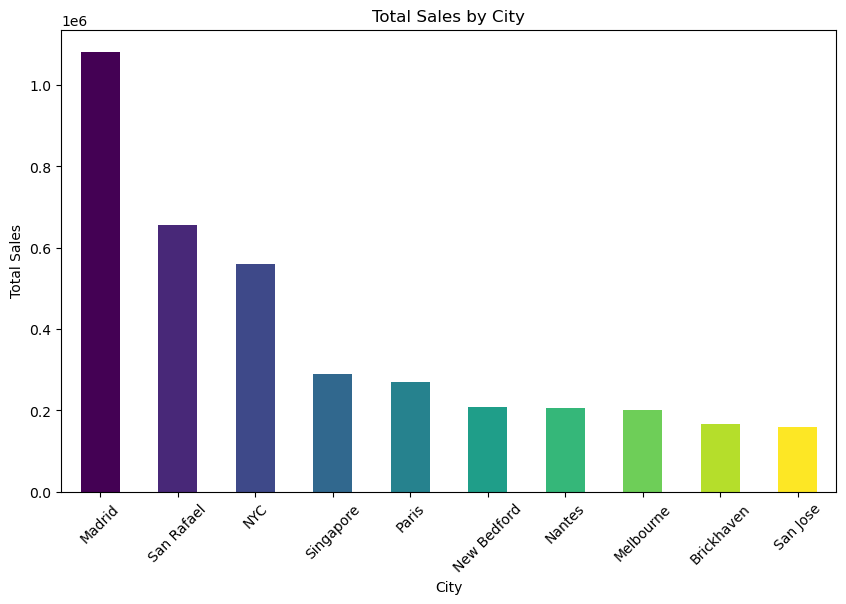

In [447]:
colors = cm.get_cmap('viridis', len(top10_city_sales))

# Creating bar plot
top10_city_sales.plot(kind='bar', figsize=(10,6), color=colors(range(len(top10_city_sales))))

# Adding title and label names
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation= 45)

# Showing the graph
plt.show()

This chart shows the total sales figures across different cities. **Madrid leads with nearly 1 million in sales, followed by San Rafael, New York City (NYC), and Singapore.** The other cities show significantly lower sales. Particularly, San Jose, Brickhaven, and Melbourne are at the bottom of the list with much smaller sales figures. **This suggests that Madrid is a dominant player in terms of sales volume, with a concentration of sales in a few major cities.**

## <font color='indianred'> <b>Sales by Product Line</b><font color='black'> 

In [366]:
product_line_sales = df.groupby('product_line')['total_price'].sum()
product_line_sales

product_line
Classic Cars        3842868.54
Motorcycles         1103512.19
Planes               969323.42
Ships                700039.22
Trains               226243.47
Trucks and Buses    1111559.19
Vintage Cars        1806675.68
Name: total_price, dtype: float64

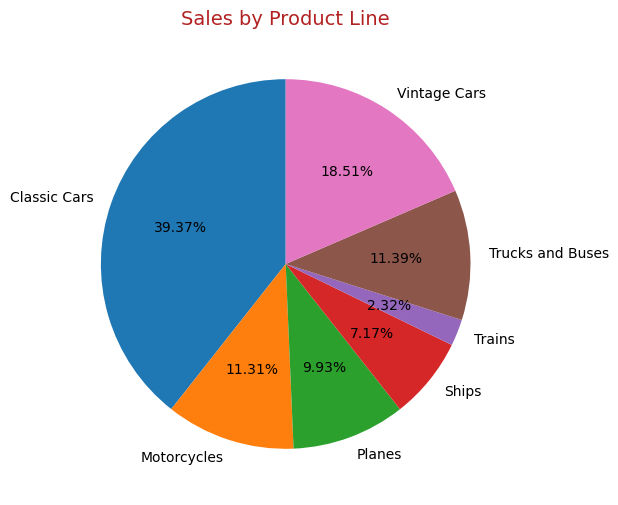

In [445]:
# Creating pie chart
plt.figure(figsize=(6, 6))

plt.pie(product_line_sales,
        labels=product_line_sales.index,
        autopct='%1.2f%%',
        startangle=90)

# Adding title
plt.title('Sales by Product Line', fontdict= {'fontsize': 14, 'color': 'firebrick'})

# Showing the graph
plt.show()

This pie chart illustrates the distribution of sales across different product categories. As seen, **Classic Cars** holds the largest share, accounting for 39.37% of total sales. This is followed by **Vintage Cars** with 18.51% and **Trucks and Buses** with 11.39%. The lowest share is attributed to "Trains" with 2.32%. **This indicates that classic cars are significantly more popular than other product categories, playing a dominant role in overall sales.**

## <font color='indianred'> <b>Top 10 Sold Products</b><font color='black'> 

In [393]:
top_selling_products = df.groupby('product_code')['quantity_ordered'].sum().nlargest(10)
top_selling_products

product_code
S18_3232     1754
S18_4600     1031
S700_4002    1029
S12_4473     1024
S24_3856     1017
S24_3949     1008
S50_1341      999
S24_2300      996
S18_2319      993
S700_2610     990
Name: quantity_ordered, dtype: int64

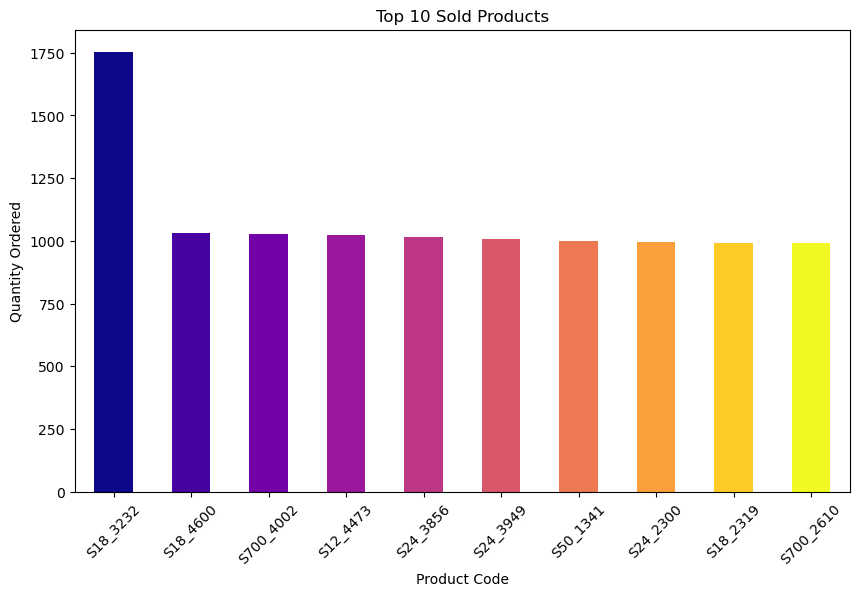

In [443]:
colors = cm.get_cmap('plasma', len(top_selling_products))

# Creating bar plot
top_selling_products.plot(kind='bar', figsize=(10,6), color=colors(range(len(top_selling_products))))

# Adding title and label names
plt.title('Top 10 Sold Products')
plt.xlabel('Product Code')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation= 45)

# Showing the graph
plt.show()

In the **Top 10 Sold Products chart**, the product with the code **S18_3232** stands out significantly compared to the others. This product leads with 1750 units sold, while the remaining 9 products are evenly distributed with 1000 units sold each. This indicates that the S18_3232 product is the clear leader in sales among the top sellers. It could imply that **this product experienced higher demand**, was **part of a promotion, or had distinct features that set it apart from the competition**. **The fact that the other products have equal sales suggests that they are relatively balanced in terms of market distribution, likely catering to a similar customer base.**

## <font color='indianred'> <b>Days Since Last Order Distribution</b><font color='black'> 

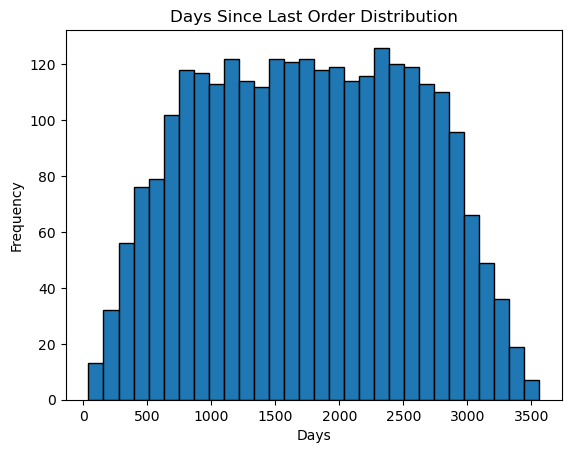

In [441]:
# Creating histogram graph
plt.hist(df['days_since_lastorder'], bins=30, edgecolor='black')

# Adding title and label names
plt.title('Days Since Last Order Distribution')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Showing the graph
plt.show()

This histogram shows the distribution of days since customers placed their last order. The chart reveals a dense distribution between approximately 1000 and 2500 days, suggesting that a large portion of customers placed their last orders within this range. At the beginning and the end of the distribution, the number of customers significantly decreases. This distribution could indicate that most of the customer base remained active over time.

**Overall, in this report the analyzed data uncovers notable sales trends and customer behaviors both by product and region. These insights are crucial for optimizing future sales strategies.**

<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THANK YOU!</b></p>